In [6]:
import cv2
import numpy as np
import os 
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [7]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilitie

In [8]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [9]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [10]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [11]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [12]:
draw_landmarks(frame, results)

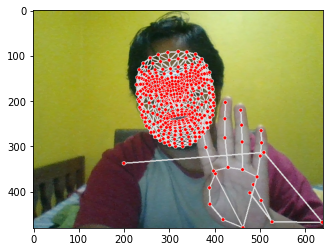

In [13]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [14]:
len(results.left_hand_landmarks.landmark)

21

In [15]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [16]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [17]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
    #if results.face_landmarks 
    #else np.zeros(1404)

In [18]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [19]:
result_test = extract_keypoints(results)

In [20]:
result_test

array([ 0.49962354,  0.45919207, -1.18610275, ...,  0.        ,
        0.        ,  0.        ])

In [21]:
np.save('0', result_test)

In [22]:
np.load('0.npy')

array([ 0.49962354,  0.45919207, -1.18610275, ...,  0.        ,
        0.        ,  0.        ])

In [23]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['ber', 'di', 'se'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 0

In [24]:
for action in actions: 
    dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    for sequence in range(1,no_sequences+1):
        try: 
            os.makedir(os.path.join(DATA_PATH, action, str(dirmax+sequence)))
        except:
            pass

In [25]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [26]:
cap.release()
cv2.destroyAllWindows()

In [27]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [28]:
label_map = {label:num for num, label in enumerate(actions)}

In [29]:
label_map

{'ber': 0, 'di': 1, 'se': 2}

In [30]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [31]:
np.array(sequences).shape

(90, 30, 1662)

In [32]:
np.array(labels).shape

(90,)

In [33]:
X = np.array(sequences)

In [34]:
X.shape

(90, 30, 1662)

In [35]:
y = to_categorical(labels).astype(int)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [37]:
y_test.shape

(5, 3)

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [39]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [40]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [41]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [42]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 5s 425ms/step - loss: 2.1684 - categorical_accuracy: 0.3647
Epoch 2/2000
3/3 [==============================] - 0s 89ms/step - loss: 7.1470 - categorical_accuracy: 0.3412
Epoch 3/2000
3/3 [==============================] - 0s 83ms/step - loss: 3.5064 - categorical_accuracy: 0.3412
Epoch 4/2000
3/3 [==============================] - 0s 75ms/step - loss: 3.1679 - categorical_accuracy: 0.2353
Epoch 5/2000
3/3 [==============================] - 0s 79ms/step - loss: 1.9759 - categorical_accuracy: 0.3412
Epoch 6/2000
3/3 [==============================] - 0s 78ms/step - loss: 2.7070 - categorical_accuracy: 0.2588
Epoch 7/2000
3/3 [==============================] - 0s 80ms/step - loss: 1.2087 - categorical_accuracy: 0.3765
Epoch 8/2000
3/3 [==============================] - 0s 78ms/step - loss: 1.1867 - categorical_accuracy: 0.3647
Epoch 9/2000
3/3 [==============================] - 0s 79ms/step - loss: 1.0980 - categorical_accuracy: 0.3529


3/3 [==============================] - 0s 86ms/step - loss: 0.9476 - categorical_accuracy: 0.4588
Epoch 75/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.9325 - categorical_accuracy: 0.6118
Epoch 76/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.8681 - categorical_accuracy: 0.6706
Epoch 77/2000
3/3 [==============================] - 0s 88ms/step - loss: 0.8082 - categorical_accuracy: 0.6353
Epoch 78/2000
3/3 [==============================] - 0s 83ms/step - loss: 0.7892 - categorical_accuracy: 0.7294
Epoch 79/2000
3/3 [==============================] - 0s 83ms/step - loss: 0.7879 - categorical_accuracy: 0.6118
Epoch 80/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.7518 - categorical_accuracy: 0.6118
Epoch 81/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.6587 - categorical_accuracy: 0.6471
Epoch 82/2000
3/3 [==============================] - 0s 88ms/step - loss: 0.6289 - categorical_accuracy: 0.7294
Epoch 

3/3 [==============================] - 0s 84ms/step - loss: 0.7044 - categorical_accuracy: 0.7059
Epoch 147/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.6809 - categorical_accuracy: 0.6824
Epoch 148/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.4827 - categorical_accuracy: 0.7176
Epoch 149/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.4292 - categorical_accuracy: 0.7412
Epoch 150/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.3201 - categorical_accuracy: 0.9412
Epoch 151/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.3037 - categorical_accuracy: 0.9059
Epoch 152/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.2868 - categorical_accuracy: 0.9176
Epoch 153/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.3556 - categorical_accuracy: 0.8706
Epoch 154/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.3805 - categorical_accuracy: 0.823

3/3 [==============================] - 0s 87ms/step - loss: 0.0532 - categorical_accuracy: 0.9765
Epoch 219/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.0657 - categorical_accuracy: 0.9647
Epoch 220/2000
3/3 [==============================] - 0s 83ms/step - loss: 0.1006 - categorical_accuracy: 0.9647
Epoch 221/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.0157 - categorical_accuracy: 1.0000
Epoch 222/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.0400 - categorical_accuracy: 0.9882
Epoch 223/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.1061 - categorical_accuracy: 0.9412
Epoch 224/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.1820 - categorical_accuracy: 0.9294
Epoch 225/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.2076 - categorical_accuracy: 0.9059
Epoch 226/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.4901 - categorical_accuracy: 0.858

3/3 [==============================] - 0s 101ms/step - loss: 0.0189 - categorical_accuracy: 1.0000
Epoch 291/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.0232 - categorical_accuracy: 1.0000
Epoch 292/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.0287 - categorical_accuracy: 0.9882
Epoch 293/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.0222 - categorical_accuracy: 1.0000
Epoch 294/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.0412 - categorical_accuracy: 0.9765
Epoch 295/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.0143 - categorical_accuracy: 1.0000
Epoch 296/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.0284 - categorical_accuracy: 0.9882
Epoch 297/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.1494 - categorical_accuracy: 0.9412
Epoch 298/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.4102 - categorical_accuracy: 0.81

3/3 [==============================] - 0s 90ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 363/2000
3/3 [==============================] - 0s 99ms/step - loss: 1.0983 - categorical_accuracy: 0.3412
Epoch 364/2000
3/3 [==============================] - 0s 91ms/step - loss: 1.0982 - categorical_accuracy: 0.3412
Epoch 365/2000
3/3 [==============================] - 0s 85ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 366/2000
3/3 [==============================] - 0s 91ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 367/2000
3/3 [==============================] - 0s 92ms/step - loss: 1.0982 - categorical_accuracy: 0.3412
Epoch 368/2000
3/3 [==============================] - 0s 78ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 369/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 370/2000
3/3 [==============================] - 0s 79ms/step - loss: 1.0981 - categorical_accuracy: 0.341

3/3 [==============================] - 0s 93ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 435/2000
3/3 [==============================] - 0s 84ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 436/2000
3/3 [==============================] - 0s 80ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 437/2000
3/3 [==============================] - 0s 80ms/step - loss: 1.0982 - categorical_accuracy: 0.3412
Epoch 438/2000
3/3 [==============================] - 0s 77ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 439/2000
3/3 [==============================] - 0s 76ms/step - loss: 1.0982 - categorical_accuracy: 0.3412
Epoch 440/2000
3/3 [==============================] - 0s 71ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 441/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 442/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.0981 - categorical_accuracy: 0.341

3/3 [==============================] - 0s 80ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 507/2000
3/3 [==============================] - 0s 77ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 508/2000
3/3 [==============================] - 0s 81ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 509/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 510/2000
3/3 [==============================] - 0s 79ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 511/2000
3/3 [==============================] - 0s 76ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 512/2000
3/3 [==============================] - 0s 86ms/step - loss: 1.0982 - categorical_accuracy: 0.3412
Epoch 513/2000
3/3 [==============================] - 0s 81ms/step - loss: 1.0982 - categorical_accuracy: 0.3412
Epoch 514/2000
3/3 [==============================] - 0s 85ms/step - loss: 1.0981 - categorical_accuracy: 0.341

3/3 [==============================] - 0s 82ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 579/2000
3/3 [==============================] - 0s 79ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 580/2000
3/3 [==============================] - 0s 79ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 581/2000
3/3 [==============================] - 0s 85ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 582/2000
3/3 [==============================] - 0s 85ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 583/2000
3/3 [==============================] - 0s 89ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 584/2000
3/3 [==============================] - 0s 79ms/step - loss: 1.0982 - categorical_accuracy: 0.3412
Epoch 585/2000
3/3 [==============================] - 0s 91ms/step - loss: 1.0980 - categorical_accuracy: 0.3412
Epoch 586/2000
3/3 [==============================] - 0s 83ms/step - loss: 1.0980 - categorical_accuracy: 0.341

3/3 [==============================] - 0s 78ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 651/2000
3/3 [==============================] - 0s 85ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 652/2000
3/3 [==============================] - 0s 79ms/step - loss: 1.0981 - categorical_accuracy: 0.2588
Epoch 653/2000
3/3 [==============================] - 0s 79ms/step - loss: 1.0982 - categorical_accuracy: 0.2706
Epoch 654/2000
3/3 [==============================] - 0s 88ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 655/2000
3/3 [==============================] - 0s 78ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 656/2000
3/3 [==============================] - 0s 77ms/step - loss: 1.0980 - categorical_accuracy: 0.3412
Epoch 657/2000
3/3 [==============================] - 0s 76ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 658/2000
3/3 [==============================] - 0s 77ms/step - loss: 1.0980 - categorical_accuracy: 0.341

3/3 [==============================] - 0s 100ms/step - loss: 1.0979 - categorical_accuracy: 0.3412
Epoch 723/2000
3/3 [==============================] - 0s 101ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 724/2000
3/3 [==============================] - 0s 85ms/step - loss: 1.0979 - categorical_accuracy: 0.3412
Epoch 725/2000
3/3 [==============================] - 0s 90ms/step - loss: 1.0980 - categorical_accuracy: 0.3412
Epoch 726/2000
3/3 [==============================] - 0s 90ms/step - loss: 1.0979 - categorical_accuracy: 0.3412
Epoch 727/2000
3/3 [==============================] - 0s 90ms/step - loss: 1.0979 - categorical_accuracy: 0.3412
Epoch 728/2000
3/3 [==============================] - 0s 84ms/step - loss: 1.0979 - categorical_accuracy: 0.3412
Epoch 729/2000
3/3 [==============================] - 0s 85ms/step - loss: 1.0979 - categorical_accuracy: 0.3412
Epoch 730/2000
3/3 [==============================] - 0s 83ms/step - loss: 1.0979 - categorical_accuracy: 0.3

3/3 [==============================] - 0s 85ms/step - loss: 4.1348 - categorical_accuracy: 0.2941
Epoch 795/2000
3/3 [==============================] - 0s 77ms/step - loss: 2.9377 - categorical_accuracy: 0.3059
Epoch 796/2000
3/3 [==============================] - 0s 77ms/step - loss: 2.0500 - categorical_accuracy: 0.3765
Epoch 797/2000
3/3 [==============================] - 0s 73ms/step - loss: 2.5677 - categorical_accuracy: 0.3176
Epoch 798/2000
3/3 [==============================] - 0s 74ms/step - loss: 2.5686 - categorical_accuracy: 0.2706
Epoch 799/2000
3/3 [==============================] - 0s 79ms/step - loss: 1.6405 - categorical_accuracy: 0.3294
Epoch 800/2000
3/3 [==============================] - 0s 77ms/step - loss: 1.9489 - categorical_accuracy: 0.3176
Epoch 801/2000
3/3 [==============================] - 0s 91ms/step - loss: 2.0326 - categorical_accuracy: 0.3176
Epoch 802/2000
3/3 [==============================] - 0s 80ms/step - loss: 2.1934 - categorical_accuracy: 0.294

3/3 [==============================] - 0s 78ms/step - loss: 1.8858 - categorical_accuracy: 0.3059
Epoch 867/2000
3/3 [==============================] - 0s 79ms/step - loss: 1.7412 - categorical_accuracy: 0.3176
Epoch 868/2000
3/3 [==============================] - 0s 76ms/step - loss: 2.0491 - categorical_accuracy: 0.2941
Epoch 869/2000
3/3 [==============================] - 0s 78ms/step - loss: 2.2669 - categorical_accuracy: 0.2706
Epoch 870/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.6330 - categorical_accuracy: 0.3294
Epoch 871/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.4749 - categorical_accuracy: 0.3412
Epoch 872/2000
3/3 [==============================] - 0s 79ms/step - loss: 2.3406 - categorical_accuracy: 0.2588
Epoch 873/2000
3/3 [==============================] - 0s 79ms/step - loss: 2.5918 - categorical_accuracy: 0.3059
Epoch 874/2000
3/3 [==============================] - 0s 79ms/step - loss: 3.1991 - categorical_accuracy: 0.317

3/3 [==============================] - 0s 85ms/step - loss: 1.7383 - categorical_accuracy: 0.3647
Epoch 939/2000
3/3 [==============================] - 0s 83ms/step - loss: 1.8515 - categorical_accuracy: 0.2588
Epoch 940/2000
3/3 [==============================] - 0s 91ms/step - loss: 1.8771 - categorical_accuracy: 0.3294
Epoch 941/2000
3/3 [==============================] - 0s 83ms/step - loss: 1.7977 - categorical_accuracy: 0.3647
Epoch 942/2000
3/3 [==============================] - 0s 82ms/step - loss: 1.5619 - categorical_accuracy: 0.3294
Epoch 943/2000
3/3 [==============================] - 0s 80ms/step - loss: 1.7366 - categorical_accuracy: 0.3294
Epoch 944/2000
3/3 [==============================] - 0s 79ms/step - loss: 1.6213 - categorical_accuracy: 0.2118
Epoch 945/2000
3/3 [==============================] - 0s 77ms/step - loss: 1.6255 - categorical_accuracy: 0.3059
Epoch 946/2000
3/3 [==============================] - 0s 82ms/step - loss: 1.3298 - categorical_accuracy: 0.352

3/3 [==============================] - 0s 76ms/step - loss: 1.8296 - categorical_accuracy: 0.3176
Epoch 1011/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.3512 - categorical_accuracy: 0.3176
Epoch 1012/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.3585 - categorical_accuracy: 0.3294
Epoch 1013/2000
3/3 [==============================] - 0s 77ms/step - loss: 1.6879 - categorical_accuracy: 0.3412
Epoch 1014/2000
3/3 [==============================] - 0s 82ms/step - loss: 1.8139 - categorical_accuracy: 0.2353
Epoch 1015/2000
3/3 [==============================] - 0s 79ms/step - loss: 1.8264 - categorical_accuracy: 0.3176
Epoch 1016/2000
3/3 [==============================] - 0s 77ms/step - loss: 2.2860 - categorical_accuracy: 0.3294
Epoch 1017/2000
3/3 [==============================] - 0s 78ms/step - loss: 1.9285 - categorical_accuracy: 0.2941
Epoch 1018/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.6231 - categorical_accurac

3/3 [==============================] - 0s 75ms/step - loss: 1.8079 - categorical_accuracy: 0.3765
Epoch 1083/2000
3/3 [==============================] - 0s 76ms/step - loss: 1.9200 - categorical_accuracy: 0.3059
Epoch 1084/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.5740 - categorical_accuracy: 0.3059
Epoch 1085/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.3257 - categorical_accuracy: 0.3412
Epoch 1086/2000
3/3 [==============================] - 0s 81ms/step - loss: 1.4823 - categorical_accuracy: 0.3294
Epoch 1087/2000
3/3 [==============================] - 0s 80ms/step - loss: 1.4344 - categorical_accuracy: 0.4118
Epoch 1088/2000
3/3 [==============================] - 0s 81ms/step - loss: 1.6057 - categorical_accuracy: 0.3059
Epoch 1089/2000
3/3 [==============================] - 0s 77ms/step - loss: 1.3604 - categorical_accuracy: 0.3294
Epoch 1090/2000
3/3 [==============================] - 0s 78ms/step - loss: 1.4246 - categorical_accurac

Epoch 1154/2000
3/3 [==============================] - 0s 86ms/step - loss: 1.0136 - categorical_accuracy: 0.4824
Epoch 1155/2000
3/3 [==============================] - 0s 77ms/step - loss: 1.2351 - categorical_accuracy: 0.3647
Epoch 1156/2000
3/3 [==============================] - 0s 79ms/step - loss: 1.2979 - categorical_accuracy: 0.2588
Epoch 1157/2000
3/3 [==============================] - 0s 78ms/step - loss: 1.1148 - categorical_accuracy: 0.3882
Epoch 1158/2000
3/3 [==============================] - 0s 92ms/step - loss: 1.3282 - categorical_accuracy: 0.4118
Epoch 1159/2000
3/3 [==============================] - 0s 83ms/step - loss: 0.9984 - categorical_accuracy: 0.4706
Epoch 1160/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.9527 - categorical_accuracy: 0.5059
Epoch 1161/2000
3/3 [==============================] - 0s 88ms/step - loss: 1.1420 - categorical_accuracy: 0.3647
Epoch 1162/2000
3/3 [==============================] - 0s 83ms/step - loss: 1.1829 - cat

3/3 [==============================] - 0s 83ms/step - loss: 1.8911 - categorical_accuracy: 0.4000
Epoch 1226/2000
3/3 [==============================] - 0s 84ms/step - loss: 1.8067 - categorical_accuracy: 0.3765
Epoch 1227/2000
3/3 [==============================] - 0s 81ms/step - loss: 1.5063 - categorical_accuracy: 0.3176
Epoch 1228/2000
3/3 [==============================] - 0s 78ms/step - loss: 1.6806 - categorical_accuracy: 0.3059
Epoch 1229/2000
3/3 [==============================] - 0s 90ms/step - loss: 1.5921 - categorical_accuracy: 0.3882
Epoch 1230/2000
3/3 [==============================] - 0s 86ms/step - loss: 1.2194 - categorical_accuracy: 0.4588
Epoch 1231/2000
3/3 [==============================] - 0s 111ms/step - loss: 1.1311 - categorical_accuracy: 0.5529
Epoch 1232/2000
3/3 [==============================] - 0s 90ms/step - loss: 1.1757 - categorical_accuracy: 0.4235
Epoch 1233/2000
3/3 [==============================] - 0s 82ms/step - loss: 1.1572 - categorical_accura

3/3 [==============================] - 0s 97ms/step - loss: 0.7557 - categorical_accuracy: 0.6706
Epoch 1297/2000
3/3 [==============================] - 0s 87ms/step - loss: 0.7655 - categorical_accuracy: 0.5765
Epoch 1298/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.9262 - categorical_accuracy: 0.5412
Epoch 1299/2000
3/3 [==============================] - 0s 83ms/step - loss: 0.8403 - categorical_accuracy: 0.6235
Epoch 1300/2000
3/3 [==============================] - 0s 86ms/step - loss: 1.0985 - categorical_accuracy: 0.4588
Epoch 1301/2000
3/3 [==============================] - 0s 109ms/step - loss: 1.1528 - categorical_accuracy: 0.4235
Epoch 1302/2000
3/3 [==============================] - 0s 91ms/step - loss: 1.2380 - categorical_accuracy: 0.5176
Epoch 1303/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0963 - categorical_accuracy: 0.4588
Epoch 1304/2000
3/3 [==============================] - 0s 90ms/step - loss: 1.5028 - categorical_accura

Epoch 1368/2000
3/3 [==============================] - 0s 70ms/step - loss: 1.1863 - categorical_accuracy: 0.4941
Epoch 1369/2000
3/3 [==============================] - 0s 69ms/step - loss: 1.0684 - categorical_accuracy: 0.4471
Epoch 1370/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.8885 - categorical_accuracy: 0.5294
Epoch 1371/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.9583 - categorical_accuracy: 0.4706
Epoch 1372/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.7540 - categorical_accuracy: 0.6353
Epoch 1373/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.8991 - categorical_accuracy: 0.5529
Epoch 1374/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.9855 - categorical_accuracy: 0.4471
Epoch 1375/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.9795 - categorical_accuracy: 0.6471
Epoch 1376/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.9910 - cat

3/3 [==============================] - 0s 67ms/step - loss: 2.0780 - categorical_accuracy: 0.4706
Epoch 1440/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.9367 - categorical_accuracy: 0.5882
Epoch 1441/2000
3/3 [==============================] - 0s 68ms/step - loss: 1.6215 - categorical_accuracy: 0.3882
Epoch 1442/2000
3/3 [==============================] - 0s 68ms/step - loss: 1.1973 - categorical_accuracy: 0.5412
Epoch 1443/2000
3/3 [==============================] - 0s 68ms/step - loss: 1.1858 - categorical_accuracy: 0.5882
Epoch 1444/2000
3/3 [==============================] - 0s 72ms/step - loss: 1.2785 - categorical_accuracy: 0.5294
Epoch 1445/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.0563 - categorical_accuracy: 0.5176
Epoch 1446/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.9611 - categorical_accuracy: 0.6235
Epoch 1447/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.7813 - categorical_accurac

3/3 [==============================] - 0s 80ms/step - loss: 84.6098 - categorical_accuracy: 0.3412
Epoch 1510/2000
3/3 [==============================] - 0s 73ms/step - loss: 47.6201 - categorical_accuracy: 0.3176
Epoch 1511/2000
3/3 [==============================] - 0s 73ms/step - loss: 75.1793 - categorical_accuracy: 0.3294
Epoch 1512/2000
3/3 [==============================] - 0s 72ms/step - loss: 64.5779 - categorical_accuracy: 0.3412
Epoch 1513/2000
3/3 [==============================] - 0s 75ms/step - loss: 23.6849 - categorical_accuracy: 0.4000
Epoch 1514/2000
3/3 [==============================] - 0s 81ms/step - loss: 45.9430 - categorical_accuracy: 0.3412
Epoch 1515/2000
3/3 [==============================] - 0s 71ms/step - loss: 55.0764 - categorical_accuracy: 0.3294
Epoch 1516/2000
3/3 [==============================] - 0s 73ms/step - loss: 46.1640 - categorical_accuracy: 0.3176
Epoch 1517/2000
3/3 [==============================] - 0s 73ms/step - loss: 32.2221 - categorica

3/3 [==============================] - 0s 78ms/step - loss: 40132.2227 - categorical_accuracy: 0.3176
Epoch 1580/2000
3/3 [==============================] - 0s 74ms/step - loss: 29347.5391 - categorical_accuracy: 0.3412
Epoch 1581/2000
3/3 [==============================] - 0s 74ms/step - loss: 27993.2168 - categorical_accuracy: 0.3412
Epoch 1582/2000
3/3 [==============================] - 0s 81ms/step - loss: 20159.6953 - categorical_accuracy: 0.3765
Epoch 1583/2000
3/3 [==============================] - 0s 85ms/step - loss: 16176.3174 - categorical_accuracy: 0.3412
Epoch 1584/2000
3/3 [==============================] - 0s 81ms/step - loss: 20889.6895 - categorical_accuracy: 0.3176
Epoch 1585/2000
3/3 [==============================] - 0s 78ms/step - loss: 18472.8359 - categorical_accuracy: 0.3176
Epoch 1586/2000
3/3 [==============================] - 0s 77ms/step - loss: 4639.2314 - categorical_accuracy: 0.2824
Epoch 1587/2000
3/3 [==============================] - 0s 80ms/step - los

3/3 [==============================] - 0s 74ms/step - loss: 14120.3086 - categorical_accuracy: 0.3294
Epoch 1649/2000
3/3 [==============================] - 0s 71ms/step - loss: 11427.4541 - categorical_accuracy: 0.3529
Epoch 1650/2000
3/3 [==============================] - 0s 74ms/step - loss: 10582.0117 - categorical_accuracy: 0.3294
Epoch 1651/2000
3/3 [==============================] - 0s 74ms/step - loss: 5943.5947 - categorical_accuracy: 0.3176
Epoch 1652/2000
3/3 [==============================] - 0s 68ms/step - loss: 4328.5381 - categorical_accuracy: 0.3647
Epoch 1653/2000
3/3 [==============================] - 0s 65ms/step - loss: 5044.8604 - categorical_accuracy: 0.3294
Epoch 1654/2000
3/3 [==============================] - 0s 69ms/step - loss: 2585.5085 - categorical_accuracy: 0.3059
Epoch 1655/2000
3/3 [==============================] - 0s 69ms/step - loss: 4986.5352 - categorical_accuracy: 0.3059
Epoch 1656/2000
3/3 [==============================] - 0s 77ms/step - loss: 3

3/3 [==============================] - 0s 81ms/step - loss: 518.2630 - categorical_accuracy: 0.3412
Epoch 1719/2000
3/3 [==============================] - 0s 75ms/step - loss: 782.1089 - categorical_accuracy: 0.2941
Epoch 1720/2000
3/3 [==============================] - 0s 70ms/step - loss: 1158.0022 - categorical_accuracy: 0.3529
Epoch 1721/2000
3/3 [==============================] - 0s 71ms/step - loss: 700.2573 - categorical_accuracy: 0.2941
Epoch 1722/2000
3/3 [==============================] - 0s 70ms/step - loss: 719.3770 - categorical_accuracy: 0.3059
Epoch 1723/2000
3/3 [==============================] - 0s 67ms/step - loss: 1010.3585 - categorical_accuracy: 0.2588
Epoch 1724/2000
3/3 [==============================] - 0s 67ms/step - loss: 571.7927 - categorical_accuracy: 0.2824
Epoch 1725/2000
3/3 [==============================] - 0s 67ms/step - loss: 706.1541 - categorical_accuracy: 0.3059
Epoch 1726/2000
3/3 [==============================] - 0s 67ms/step - loss: 419.9555 -

3/3 [==============================] - 0s 78ms/step - loss: 1126.1494 - categorical_accuracy: 0.3412
Epoch 1789/2000
3/3 [==============================] - 0s 73ms/step - loss: 979.5782 - categorical_accuracy: 0.3176
Epoch 1790/2000
3/3 [==============================] - 0s 73ms/step - loss: 255.6698 - categorical_accuracy: 0.3647
Epoch 1791/2000
3/3 [==============================] - 0s 74ms/step - loss: 269.6051 - categorical_accuracy: 0.3412
Epoch 1792/2000
3/3 [==============================] - 0s 77ms/step - loss: 658.6710 - categorical_accuracy: 0.2471
Epoch 1793/2000
3/3 [==============================] - 0s 71ms/step - loss: 586.4658 - categorical_accuracy: 0.3176
Epoch 1794/2000
3/3 [==============================] - 0s 67ms/step - loss: 640.6942 - categorical_accuracy: 0.3412
Epoch 1795/2000
3/3 [==============================] - 0s 68ms/step - loss: 639.9618 - categorical_accuracy: 0.3412
Epoch 1796/2000
3/3 [==============================] - 0s 68ms/step - loss: 484.5043 - 

3/3 [==============================] - 0s 67ms/step - loss: 416.7489 - categorical_accuracy: 0.3059
Epoch 1859/2000
3/3 [==============================] - 0s 65ms/step - loss: 313.5693 - categorical_accuracy: 0.3882
Epoch 1860/2000
3/3 [==============================] - 0s 67ms/step - loss: 457.8064 - categorical_accuracy: 0.3294
Epoch 1861/2000
3/3 [==============================] - 0s 77ms/step - loss: 283.9636 - categorical_accuracy: 0.2706
Epoch 1862/2000
3/3 [==============================] - 0s 72ms/step - loss: 197.4352 - categorical_accuracy: 0.3529
Epoch 1863/2000
3/3 [==============================] - 0s 69ms/step - loss: 397.4226 - categorical_accuracy: 0.3529
Epoch 1864/2000
3/3 [==============================] - 0s 72ms/step - loss: 209.5376 - categorical_accuracy: 0.3294
Epoch 1865/2000
3/3 [==============================] - 0s 68ms/step - loss: 188.5898 - categorical_accuracy: 0.3647
Epoch 1866/2000
3/3 [==============================] - 0s 65ms/step - loss: 418.0429 - c

3/3 [==============================] - 0s 71ms/step - loss: 562.5071 - categorical_accuracy: 0.3529
Epoch 1929/2000
3/3 [==============================] - 0s 66ms/step - loss: 224.0029 - categorical_accuracy: 0.3412
Epoch 1930/2000
3/3 [==============================] - 0s 67ms/step - loss: 372.7825 - categorical_accuracy: 0.3059
Epoch 1931/2000
3/3 [==============================] - 0s 65ms/step - loss: 428.3393 - categorical_accuracy: 0.3412
Epoch 1932/2000
3/3 [==============================] - 0s 66ms/step - loss: 534.2936 - categorical_accuracy: 0.3647
Epoch 1933/2000
3/3 [==============================] - 0s 66ms/step - loss: 659.2612 - categorical_accuracy: 0.3412
Epoch 1934/2000
3/3 [==============================] - 0s 66ms/step - loss: 519.5443 - categorical_accuracy: 0.3176
Epoch 1935/2000
3/3 [==============================] - 0s 71ms/step - loss: 346.2576 - categorical_accuracy: 0.3294
Epoch 1936/2000
3/3 [==============================] - 0s 68ms/step - loss: 472.8837 - c

3/3 [==============================] - 0s 67ms/step - loss: 357.6921 - categorical_accuracy: 0.3412
Epoch 1999/2000
3/3 [==============================] - 0s 67ms/step - loss: 993.0369 - categorical_accuracy: 0.3176
Epoch 2000/2000
3/3 [==============================] - 0s 68ms/step - loss: 443.0004 - categorical_accuracy: 0.3882


In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
__________________________________________________

In [44]:
res = model.predict(X_test)

In [45]:
actions[np.argmax(res[4])]

'se'

In [46]:
actions[np.argmax(y_test[4])]

'ber'

In [62]:
model.save('action.h5')

NameError: name 'model' is not defined

In [60]:
#del model

In [61]:
model.load_weights('action.h5')

NameError: name 'model' is not defined

In [50]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [51]:
yhat = model.predict(X_test)

In [52]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [53]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[2, 0],
        [3, 0]],

       [[4, 0],
        [1, 0]],

       [[0, 4],
        [0, 1]]], dtype=int64)

In [54]:
accuracy_score(ytrue, yhat)

0.2

In [55]:
from scipy import stats

In [56]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [57]:
plt.figure(figsize=(18,18))
#plt.imshow(prob_viz(res, actions, image, colors))

<Figure size 1296x1296 with 0 Axes>

<Figure size 1296x1296 with 0 Axes>

In [58]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

se
<class 'mediapipe.python.solution_base.SolutionOutputs'>
se
<class 'mediapipe.python.solution_base.SolutionOutputs'>
se
<class 'mediapipe.python.solution_base.SolutionOutputs'>
se
<class 'mediapipe.python.solution_base.SolutionOutputs'>
se
<class 'mediapipe.python.solution_base.SolutionOutputs'>
se
<class 'mediapipe.python.solution_base.SolutionOutputs'>
se
<class 'mediapipe.python.solution_base.SolutionOutputs'>
se
<class 'mediapipe.python.solution_base.SolutionOutputs'>
se
<class 'mediapipe.python.solution_base.SolutionOutputs'>
se
<class 'mediapipe.python.solution_base.SolutionOutputs'>
se
<class 'mediapipe.python.solution_base.SolutionOutputs'>
se
<class 'mediapipe.python.solution_base.SolutionOutputs'>
se
<class 'mediapipe.python.solution_base.SolutionOutputs'>
se
<class 'mediapipe.python.solution_base.SolutionOutputs'>
se
<class 'mediapipe.python.solution_base.SolutionOutputs'>
se
<class 'mediapipe.python.solution_base.SolutionOutputs'>
se
<class 'mediapipe.python.solution_bas

<class 'mediapipe.python.solution_base.SolutionOutputs'>
se
<class 'mediapipe.python.solution_base.SolutionOutputs'>
se
<class 'mediapipe.python.solution_base.SolutionOutputs'>
se
<class 'mediapipe.python.solution_base.SolutionOutputs'>
se
<class 'mediapipe.python.solution_base.SolutionOutputs'>
se
<class 'mediapipe.python.solution_base.SolutionOutputs'>
se
<class 'mediapipe.python.solution_base.SolutionOutputs'>
se
<class 'mediapipe.python.solution_base.SolutionOutputs'>
se
<class 'mediapipe.python.solution_base.SolutionOutputs'>
se
<class 'mediapipe.python.solution_base.SolutionOutputs'>
se
<class 'mediapipe.python.solution_base.SolutionOutputs'>
se
<class 'mediapipe.python.solution_base.SolutionOutputs'>
se
<class 'mediapipe.python.solution_base.SolutionOutputs'>
se
<class 'mediapipe.python.solution_base.SolutionOutputs'>
se
<class 'mediapipe.python.solution_base.SolutionOutputs'>
se
<class 'mediapipe.python.solution_base.SolutionOutputs'>
se
<class 'mediapipe.python.solution_base.S

se
<class 'mediapipe.python.solution_base.SolutionOutputs'>
se
<class 'mediapipe.python.solution_base.SolutionOutputs'>
se
<class 'mediapipe.python.solution_base.SolutionOutputs'>
se
<class 'mediapipe.python.solution_base.SolutionOutputs'>
se
<class 'mediapipe.python.solution_base.SolutionOutputs'>
se
<class 'mediapipe.python.solution_base.SolutionOutputs'>
se
<class 'mediapipe.python.solution_base.SolutionOutputs'>
se
<class 'mediapipe.python.solution_base.SolutionOutputs'>
se
<class 'mediapipe.python.solution_base.SolutionOutputs'>
se
<class 'mediapipe.python.solution_base.SolutionOutputs'>
se
<class 'mediapipe.python.solution_base.SolutionOutputs'>
se
<class 'mediapipe.python.solution_base.SolutionOutputs'>
se
<class 'mediapipe.python.solution_base.SolutionOutputs'>
se
<class 'mediapipe.python.solution_base.SolutionOutputs'>
se
<class 'mediapipe.python.solution_base.SolutionOutputs'>
se
<class 'mediapipe.python.solution_base.SolutionOutputs'>
se
<class 'mediapipe.python.solution_bas